In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

pd.options.mode.chained_assignment = None

In [2]:
from Code import plot_physio

## Set Paths and Parameters

In [3]:
# ToDo: Adapt wave and problematic subject list
wave = 1

In [4]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

In [5]:
SA_score="SPAI"

## Physiology

In [7]:
df_events = pd.read_csv(os.path.join(file_path, 'events.csv'), decimal='.', sep=';')
df_distance = pd.read_csv(os.path.join(file_path, 'distance_vh.csv'), decimal='.', sep=';')
df_movement = pd.read_csv(os.path.join(file_path, 'movement.csv'), decimal='.', sep=';')
df_walk_dist = pd.read_csv(os.path.join(file_path, 'walking_distance.csv'), decimal='.', sep=';')

In [8]:
save_path = os.path.join(file_path, 'Physiology')
if not os.path.exists(save_path):
    os.makedirs(save_path)

100%|██████████| 1000/1000 [01:10<00:00, 14.14it/s]


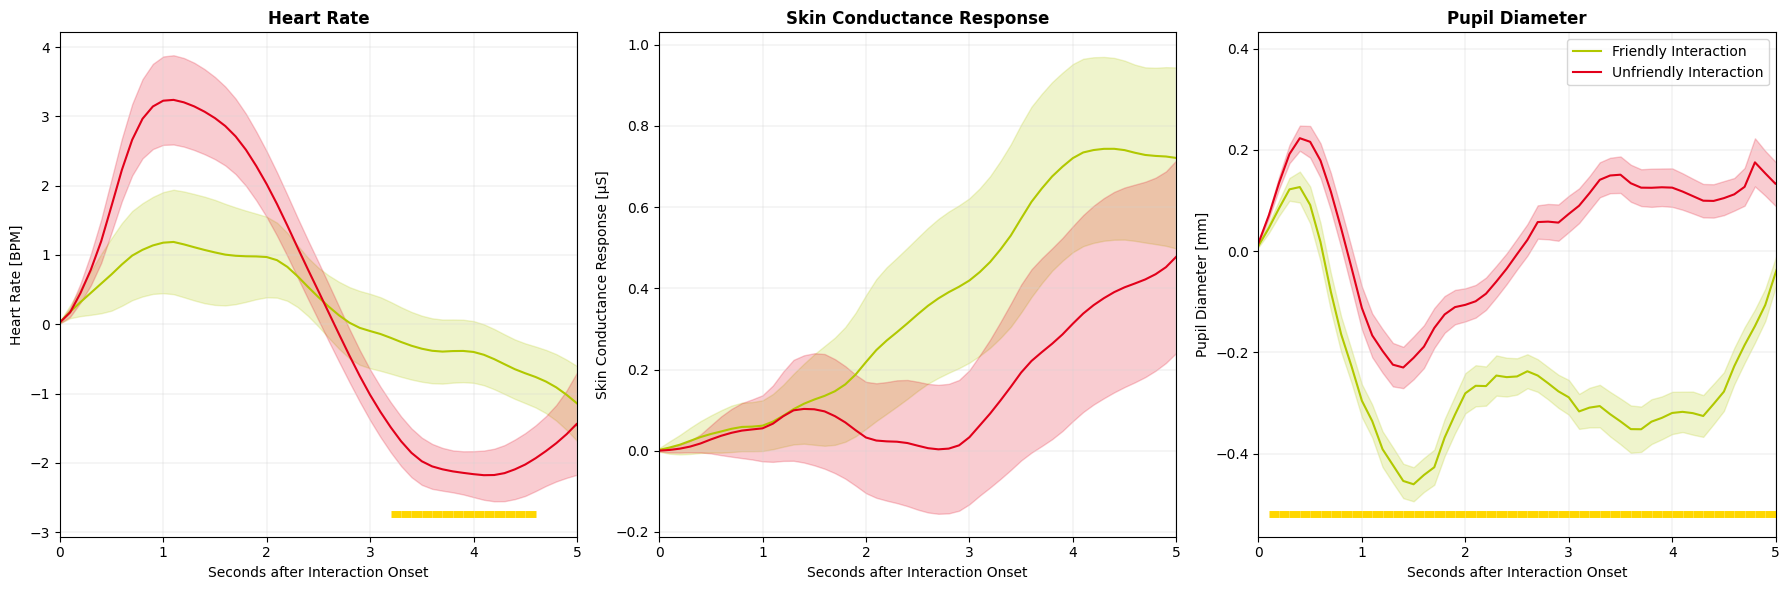

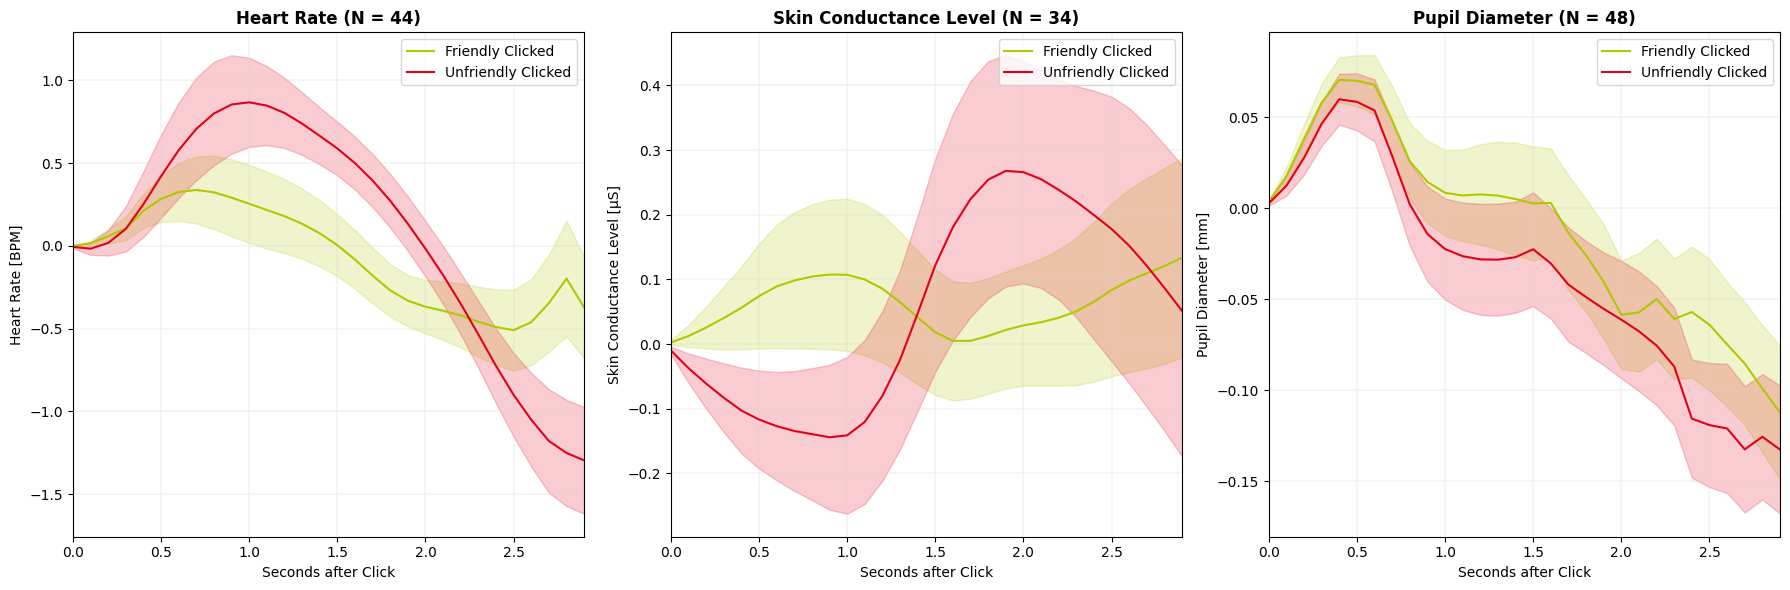

In [9]:
plot_physio.plot_physio_acq(file_path)
plt.savefig(os.path.join(save_path, f"physiology_acq.png"), dpi=300)

if wave == 1:
    plot_physio.plot_physio_click(file_path)
    plt.savefig(os.path.join(save_path, f"physiology_click.png"), dpi=300)

In [ ]:
SA_score = "SPAI"
plot_physio.plot_physio_test(file_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_hab-test.png"), dpi=300, bbox_inches="tight")

for physiology in ["hr", "eda", "pupil", "hrv_hf", "hrv_rmssd"]:
    plot_physio.plot_physio_test_sad(file_path, physiology, SA_score)
    plt.savefig(os.path.join(save_path, f"{physiology}_test_{SA_score}.png"), dpi=300)

plot_physio.plot_physio_test_diff(file_path, SA_score)
plt.savefig(os.path.join(save_path, f"{physiology}_diff_{SA_score}.png"), dpi=300)